# Approaches
- Isolation Forest + Uncertainty Sampling + Random Forest
- Isolation Forest + Expected Model Change + Random Forest

In [6]:
with open('seeds.txt', 'r') as f:
    SEEDS = [int(line.strip()) for line in f.readlines()]
    
print(SEEDS)

BATCH_SIZES = [200, 500, 1000, 1500, 2000]

[42, 100, 1, 10, 20]


# Load Data

In [7]:
import kagglehub
import pandas as pd

main_folder = "elliptic_bitcoin_dataset"
filenames = ["elliptic_txs_classes", "elliptic_txs_edgelist", "elliptic_txs_features"]

# Download
path = kagglehub.dataset_download("ellipticco/elliptic-data-set")

# Read
class_df = pd.read_csv(f"{path}/{main_folder}/{filenames[0]}.csv")
edgelist_df = pd.read_csv(f"{path}/{main_folder}/{filenames[1]}.csv")
features_df = pd.read_csv(f"{path}/{main_folder}/{filenames[2]}.csv", header=None)

# Preview
print("Class Data:")
print(class_df.head())

print("\nEdgelist Data:")
print(edgelist_df.head())

print("\nFeatures Data:")
print(features_df.head())

Class Data:
        txId    class
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown

Edgelist Data:
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  230459870
3  230333930  230595899
4  232013274  232029206

Features Data:
         0    1         2         3         4          5         6    \
0  230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

        7          8         9    ...       157       158       159       160  \
0 -0.113002  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369   
1 -0.113002  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556   
2 -0

In [193]:
display(class_df.describe())

display(edgelist_df.describe())

display(features_df.describe())

,txId
count,2.037690e+05
mean,1.711310e+08
std,1.104655e+08
min,1.076000e+03
25%,8.433452e+07
50%,1.624375e+08
75%,2.454798e+08
max,4.032446e+08


,txId1,txId2
count,2.343550e+05,2.343550e+05
mean,1.612218e+08,1.686881e+08
std,1.134457e+08,1.110120e+08
min,1.076000e+03,1.076000e+03
25%,6.933967e+07,7.342958e+07
50%,1.555782e+08,1.575814e+08
75%,2.433861e+08,2.454072e+08
max,4.032446e+08,4.032446e+08


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,203769.000000,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,2.231681e-17,1.785345e-17,3.570689e-17,6.890314e-17,7.755091e-17,5.746578e-17,2.566433e-17,2.901185e-17,4.463361e-17,4.658634e-17,1.339008e-17,5.356034e-17,-1.562177e-17,4.881802e-17,9.149891e-17,4.184401e-17,2.008513e-17,-3.124353e-17,4.463361e-17,9.819395e-17,-9.149891e-17,1.841137e-17,3.124353e-17,3.124353e-17,3.124353e-17,8.368803e-17,4.574945e-17,7.866675e-17,-4.463361e-18,3.570689e-17,5.132866e-17,3.459105e-17,1.673761e-17,2.454849e-17,6.695042e-18,4.463361e-18,2.008513e-17,-1.085155e-16,-4.295985e-17,3.570689e-17,2.678017e-17,2.901185e-17,3.570689e-17,1.673761e-17,-8.257219e-17,4.909698e-17,2.231681e-17,0.000000,...,2.147993e-17,6.667146e-17,5.802370e-17,-1.115840e-17,-2.231681e-18,5.356034e-17,2.008513e-17,4.686530e-17,8.285115e-17,4.463361e-17,8.034051e-17,4.463361e-18,-1.394800e-17,-1.869033e-17,3.347521e-17,3.235937e-17,4.017025e-17,5.021282e-18,2.901185e-17,3.793857e-17,4.284827e-16,-5.713103e-16,1.048890e-16,-3.213620e-15,8.926723e-18,9.149891e-17,2.678017e-17,3.570689e-17,-3.570689e-17,-1.785345e-17,8.926723e-17,-8.926723e-18,-2.142414e-16,-1.071207e-16,-2.231681e-16,-7.141378e-16,2.231681e-17,4.463361e-18,8.926723e-18,3.905441e-17,-3.235937e-17,1.595652e-16,-8.480387e-17,6.695042e-17,-4.686530e-17,-2.231681e-18,5.356034e-17,1.339008e-17,3.570689e-17,6.025538e-17
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.

## Data Preprocessing

In [8]:
# Create column names
colnames1 = {'0': 'txId', 1: "time_step"}
colnames2 = {str(ii+2): "local_feature_" + str(ii+1) for ii in range(93)}
colnames3 = {str(ii+95): "aggregate_feature_" + str(ii+1) for ii in range(72)}

colnames = dict(colnames1, **colnames2, **colnames3 )
colnames = {int(jj): item_kk for jj,item_kk in colnames.items()}

features_df.rename(columns=colnames, inplace=True)

display(features_df.head())

# Change unknown class to 3, 2 is licit, 1 is illicit
class_df.loc[class_df['class'] == 'unknown', 'class'] = 3
df = pd.merge(class_df, features_df)

# Split train-test data based on time steps (Weber et al)
df['class'] = df['class'].astype(int)
df['time_step'] = df['time_step'].astype(int)

df.set_index('txId', inplace=True)

display(df.head())
display(df.shape)

,txId,time_step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


,class,time_step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
txId,,,,,,,,,,,,,,,,,,,,,
230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
232022460,3,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
230460314,3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


(203769, 167)

In [9]:
df_labeled = df[df['class'].isin([1, 2])] # only include labeled samples
df_unlabeled = df[df['class'] == 3] # only include unlabeled samples

df['time_step'] = df['time_step'].astype(int)
train_df = df_labeled[df_labeled['time_step'] <= 34].copy()
test_df = df_labeled[df_labeled['time_step'] >= 35].copy()

# Extract features and labels for train/test
feature_cols = [col for col in df.columns if col.startswith("local_") or col.startswith("aggregate_")]

X_train = train_df[feature_cols].values
y_train = train_df['class'].map({1:1, 2:0}).values # map labels: illicit=1, licit=0

X_test = test_df[feature_cols].values
y_test = test_df['class'].map({1:1, 2:0}).values

time_steps_test = test_df['time_step'].values

print(df_labeled.shape)
print(df_unlabeled.shape)
print(X_train.shape)
print(X_test.shape)

X_labeled = df_labeled[feature_cols].values
y_labeled = df_labeled['class']

X_unlabeled = df_unlabeled[feature_cols].values

(46564, 167)
(157205, 167)
(29894, 165)
(16670, 165)


## Train

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import f1_score
from scipy.stats import entropy

def isolation_forest_sampling(X_train, unlabeled_idx, n_instances, contamination=0.1, seed=42):
    X_unlabeled = X_train[unlabeled_idx]

    # Fit Isolation Forest
    iso = IsolationForest(contamination=contamination, random_state=seed)
    preds = iso.fit_predict(X_unlabeled)

    # Keep only inliers
    inlier_mask = preds == 1
    inlier_indices = np.where(inlier_mask)[0]  # Get the indices of inliers

    # Map back to the original indices in `unlabeled_idx`
    inlier_indices = np.array(unlabeled_idx)[inlier_indices].tolist()
    
    np.random.seed(seed)

    # Randomly sample from inliers
    selected_indices = np.random.choice(inlier_indices, size=min(n_instances, len(inlier_indices)), replace=False)

    return list(selected_indices)

def uncertainty_sampling(probs, n_instances):
    uncertainty = np.abs(probs[:,1] - 0.5)
    query_idx = np.argsort(uncertainty)[:n_instances]
    return query_idx

def expected_model_change_sampling_rf(probs, n_instances):
    # Approximate EMC for RF by using predictive entropy as proxy
    # probs shape (n_samples, n_classes)
    ent = entropy(probs.T)
    query_idx = np.argsort(ent)[-n_instances:]  # highest entropy (most info gain)
    return query_idx

# --- Active Learning loop for the two models ---

def active_learning_loop(X_train, y_train, X_test, y_test,
                         warmup_size=100, batch_size=50, max_iters=50,
                         hot_learner='uncertainty'):
    
    compiled_f1_scores = []
    for seed in SEEDS:
        np.random.seed(seed)

        n_samples = X_train.shape[0]
        unlabeled_idx = np.arange(n_samples)
        labeled_idx = np.array([], dtype=int)

        # Warm-up learner: randomly label warmup_size samples
        warmup_idx = isolation_forest_sampling(X_train, unlabeled_idx, warmup_size)
        labeled_idx = np.concatenate([labeled_idx, warmup_idx])
        unlabeled_idx = np.array([i for i in unlabeled_idx if i not in warmup_idx])

        f1_scores = []

        for it in range(max_iters):
            # Train RF classifier on labeled data
            clf = RandomForestClassifier(random_state=seed)
            clf.fit(X_train[labeled_idx], y_train[labeled_idx])

            # Evaluate on test set, F1 for illicit class=1
            y_pred = clf.predict(X_test)
            f1 = f1_score(y_test, y_pred, pos_label=1)
            f1_scores.append(f1)
            if (it+1) % 10 == 0:
                print(f"Iteration {it+1}/{max_iters}, Labeled size: {len(labeled_idx)}, F1(illicit) = {f1:.4f}")

            if len(unlabeled_idx) == 0:
                print("No more unlabeled samples.")
                break

            # Hot learner selects samples from unlabeled
            probs = clf.predict_proba(X_train[unlabeled_idx])

            if hot_learner == 'uncertainty':
                query_rel_idx = uncertainty_sampling(probs, batch_size)
            elif hot_learner == 'expected_model_change':
                query_rel_idx = expected_model_change_sampling_rf(probs, batch_size)
            else:
                raise ValueError("hot_learner must be 'uncertainty' or 'expected_model_change'")

            query_idx = unlabeled_idx[query_rel_idx]

            # Add queried samples to labeled set, remove from unlabeled set
            labeled_idx = np.concatenate([labeled_idx, query_idx])
            unlabeled_idx = np.array([i for i in unlabeled_idx if i not in query_idx])
        
        compiled_f1_scores.append(f1_scores)
    return compiled_f1_scores

In [18]:
from matplotlib import pyplot as plt

def compute_confidence_interval(all_f1_scores, batch_size, N_runs=len(SEEDS)):
    max_len = max(len(scores) for scores in all_f1_scores)
    f1_matrix = np.full((N_runs, max_len), np.nan)
    for i, scores in enumerate(all_f1_scores):
        f1_matrix[i, :len(scores)] = scores

    # Median & CI
    median_f1 = np.nanmedian(f1_matrix, axis=0)
    std_f1 = np.nanstd(f1_matrix, axis=0)
    ci_95 = 1.57 * std_f1 / np.sqrt(N_runs)  # Approx 95% CI

    # --- Already computed:
    # f1_matrix = shape (5, N_iter)
    # median_f1 = np.nanmedian(f1_matrix, axis=0)

    # Print Mean F1-score per cycle (across 5 runs)
    mean_f1 = np.nanmean(f1_matrix, axis=0)

    print("\n===== Mean F1-score across 5 runs per cycle =====")
    for i, f1 in enumerate(mean_f1):
        print(f"Cycle {i+1:02d}, Labeled {(i+1)*batch_size} samples: Mean F1 = {f1:.4f}")
    
    x_axis = np.arange(1, len(median_f1)+1) * batch_size

    plt.figure(figsize=(8, 5))
    plt.plot(x_axis, median_f1, marker='o', label='Median F1 (N=5 runs)')
    plt.fill_between(x_axis, median_f1 - ci_95, median_f1 + ci_95, alpha=0.2, label='~95% CI')
    plt.title("Active Learning (EMC) N=5 runs — Median F1 + 95% CI")
    plt.xlabel("Number of Labeled Samples")
    plt.ylabel("Illicit F1-score")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return mean_f1[-1]
    

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 200 samples: Mean F1 = 0.7210
Cycle 02, Labeled 400 samples: Mean F1 = 0.6388
Cycle 03, Labeled 600 samples: Mean F1 = 0.7671
Cycle 04, Labeled 800 samples: Mean F1 = 0.7874
Cycle 05, Labeled 1000 samples: Mean F1 = 0.8118
Cycle 06, Labeled 1200 samples: Mean F1 = 0.7958
Cycle 07, Labeled 1400 samples: Mean F1 = 0.8138
Cycle 08, Labeled 1600 samples: Mean F1 = 0.8228
Cycle 09, Labeled 1800 samples: Mean F1 = 0.8204
Cycle 10, Labeled 2000 samples: Mean F1 = 0.8230
Cycle 11, Labeled 2200 samples: Mean F1 = 0.8265
Cycle 12, Labeled 2400 samples: Mean F1 = 0.8265
Cycle 13, Labeled 2600 samples: Mean F1 = 0.8270
Cycle 14, Labeled 2800 samples: Mean

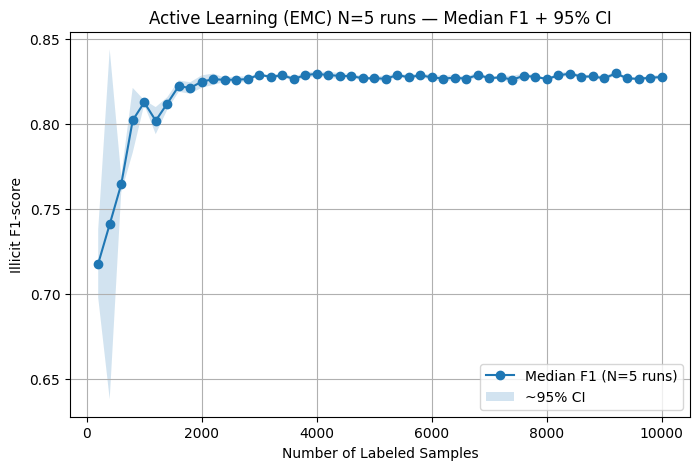

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 500 samples: Mean F1 = 0.7210
Cycle 02, Labeled 1000 samples: Mean F1 = 0.6742
Cycle 03, Labeled 1500 samples: Mean F1 = 0.7947
Cycle 04, Labeled 2000 samples: Mean F1 = 0.8011
Cycle 05, Labeled 2500 samples: Mean F1 = 0.8152
Cycle 06, Labeled 3000 samples: Mean F1 = 0.8251
Cycle 07, Labeled 3500 samples: Mean F1 = 0.8258
Cycle 08, Labeled 4000 samples: Mean F1 = 0.8277
Cycle 09, Labeled 4500 samples: Mean F1 = 0.8267
Cycle 10, Labeled 5000 samples: Mean F1 = 0.8290
Cycle 11, Labeled 5500 samples: Mean F1 = 0.8263
Cycle 12, Labeled 6000 samples: Mean F1 = 0.8288
Cycle 13, Labeled 6500 samples: Mean F1 = 0.8273
Cycle 14, Labeled 7000 samples: M

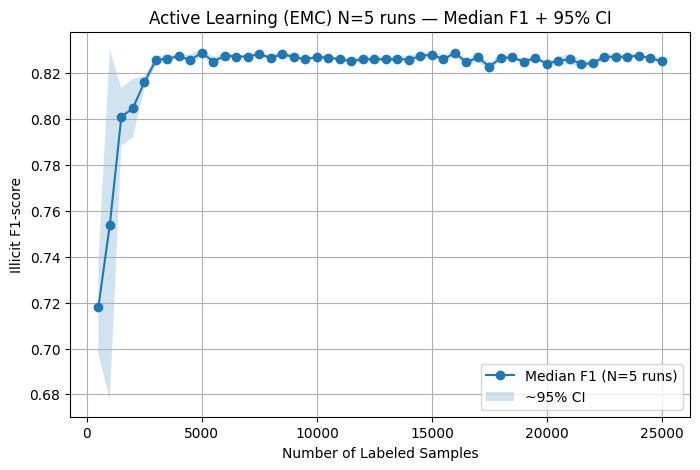

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 1000 samples: Mean F1 = 0.7210
Cycle 02, Labeled 2000 samples: Mean F1 = 0.7603
Cycle 03, Labeled 3000 samples: Mean F1 = 0.8155
Cycle 04, Labeled 4000 samples: Mean F1 = 0.8218
Cycle 05, Labeled 5000 samples: Mean F1 = 0.8262
Cycle 06, Labeled 6000 samples: Mean F1 = 0.8263
Cycle 07, Labeled 7000 samples: Mean F1 = 0.8275
Cycle 08, Labeled 8000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 9000 samples: Mean F1 = 0.8269
Cycle 10, Labeled 10000 samples: Mean F1 = 0.8277
Cycle 11, Labeled 11000 samples: Mean F1 = 

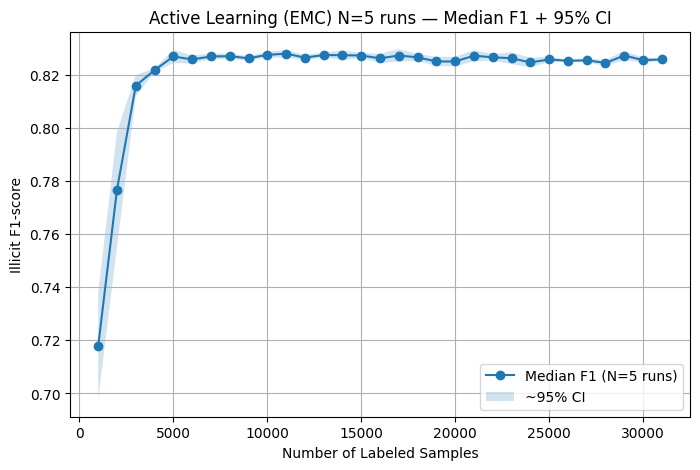

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 1500 samples: Mean F1 = 0.7210
Cycle 02, Labeled 3000 samples: Mean F1 = 0.7816
Cycle 03, Labeled 4500 samples: Mean F1 = 0.8186
Cycle 04, Labeled 6000 samples: Mean F1 = 0.8286
Cycle 05, Labeled 7500 samples: Mean F1 = 0.8296
Cycle 06, Labeled 9000 samples: Mean F1 = 0.8265
Cycle 07, Labeled 10500 samples: Mean F1 = 0.8276
Cycle 08, Labeled 12000 samples: Mean F1 = 0.8261
Cycle 09, Labeled 13500 samples: Mean F1 = 0.8239
Cycle 10, Labeled 15000 samples: Mean F1 = 0.8252
Cycle 11, Labeled 16500 samples: Mean F1

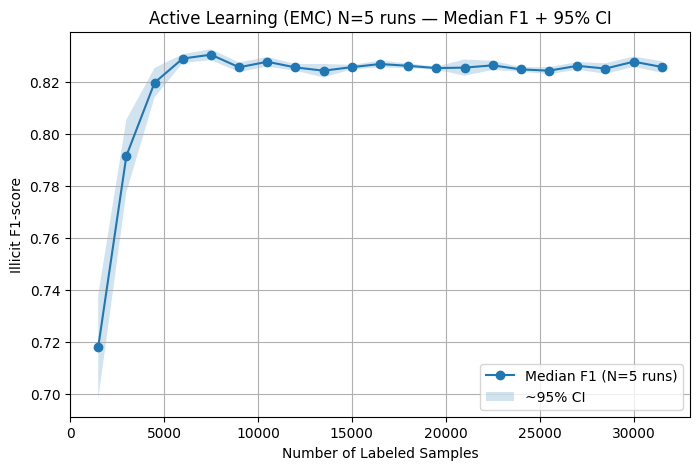

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 2000 samples: Mean F1 = 0.7210
Cycle 02, Labeled 4000 samples: Mean F1 = 0.8059
Cycle 03, Labeled 6000 samples: Mean F1 = 0.8230
Cycle 04, Labeled 8000 samples: Mean F1 = 0.8280
Cycle 05, Labeled 10000 samples: Mean F1 = 0.8296
Cycle 06, Labeled 12000 samples: Mean F1 = 0.8283
Cycle 07, Labeled 14000 samples: Mean F1 = 0.8255
Cycle 08, Labeled 16000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 18000 samples: Mean F1 = 0.8268
Cycle 10, Labeled 20000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 22000 samples: Mean 

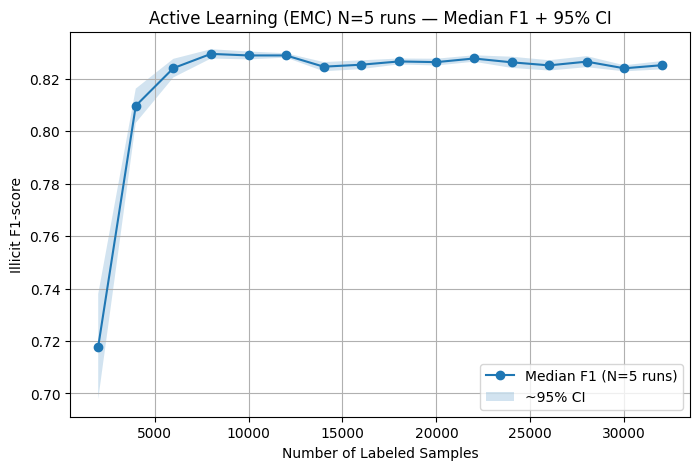

In [19]:
batch_results = {}

for batch_size in BATCH_SIZES:
    f1_model1 = active_learning_loop(
        X_train, y_train, X_test, y_test,
        batch_size=batch_size, hot_learner='uncertainty'
    )
    batch_results[batch_size] = compute_confidence_interval(f1_model1, batch_size=batch_size)

In [21]:
import json

with open("results.json", "r") as f:
    json_input = json.load(f)
    
json_input["IF + Uncertainty Sampling + RF"] = batch_results

with open("results.json", "w") as f:
    json.dump(json_input, f, indent=4)

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 200 samples: Mean F1 = 0.7210
Cycle 02, Labeled 400 samples: Mean F1 = 0.8059
Cycle 03, Labeled 600 samples: Mean F1 = 0.8230
Cycle 04, Labeled 800 samples: Mean F1 = 0.8280
Cycle 05, Labeled 1000 samples: Mean F1 = 0.8296
Cycle 06, Labeled 1200 samples: Mean F1 = 0.8283
Cycle 07, Labeled 1400 samples: Mean F1 = 0.8255
Cycle 08, Labeled 1600 samples: Mean F1 = 0.8265
Cycle 09, Labeled 1800 samples: Mean F1 = 0.8268
Cycle 10, Labeled 2000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 2200 samples: Mean F1 = 0.8274
Cycle 12, Labeled 2400 samples: Mean F1 = 0.8258
Cycle 13, Labeled 2600 samples: Mean F1 = 0.8248
Cycle 14, Labeled 2800 samples: Mean

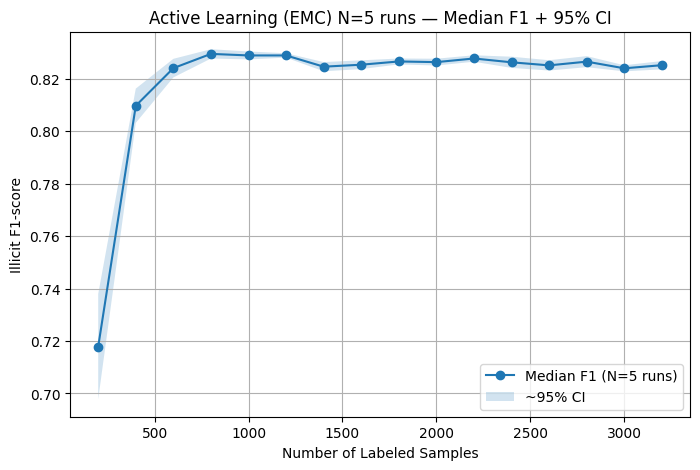

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 500 samples: Mean F1 = 0.7210
Cycle 02, Labeled 1000 samples: Mean F1 = 0.8059
Cycle 03, Labeled 1500 samples: Mean F1 = 0.8230
Cycle 04, Labeled 2000 samples: Mean F1 = 0.8280
Cycle 05, Labeled 2500 samples: Mean F1 = 0.8296
Cycle 06, Labeled 3000 samples: Mean F1 = 0.8283
Cycle 07, Labeled 3500 samples: Mean F1 = 0.8255
Cycle 08, Labeled 4000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 4500 samples: Mean F1 = 0.8268
Cycle 10, Labeled 5000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 5500 samples: Mean F1 = 0.8274
Cycle 12, Labeled 6000 samples: Mean F1 = 0.8258
Cycle 13, Labeled 6500 samples: Mean F1 = 0.8248
Cycle 14, Labeled 7000 samples: M

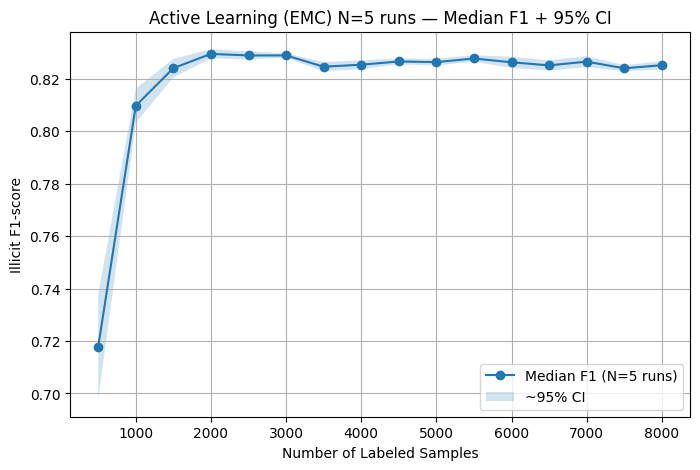

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 1000 samples: Mean F1 = 0.7210
Cycle 02, Labeled 2000 samples: Mean F1 = 0.8059
Cycle 03, Labeled 3000 samples: Mean F1 = 0.8230
Cycle 04, Labeled 4000 samples: Mean F1 = 0.8280
Cycle 05, Labeled 5000 samples: Mean F1 = 0.8296
Cycle 06, Labeled 6000 samples: Mean F1 = 0.8283
Cycle 07, Labeled 7000 samples: Mean F1 = 0.8255
Cycle 08, Labeled 8000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 9000 samples: Mean F1 = 0.8268
Cycle 10, Labeled 10000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 11000 samples: Mean F1 = 

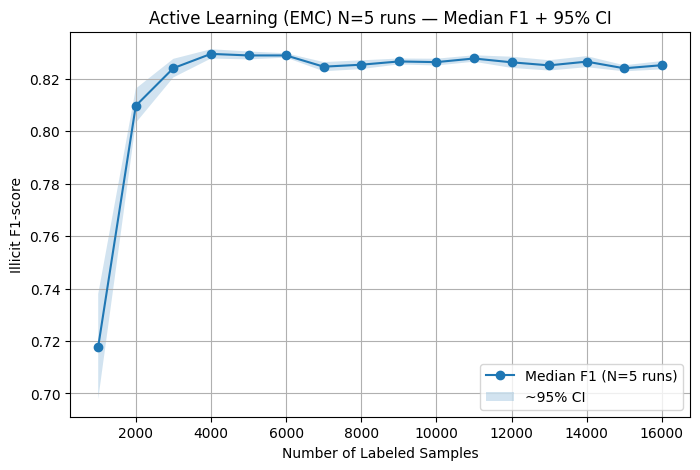

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 1500 samples: Mean F1 = 0.7210
Cycle 02, Labeled 3000 samples: Mean F1 = 0.8059
Cycle 03, Labeled 4500 samples: Mean F1 = 0.8230
Cycle 04, Labeled 6000 samples: Mean F1 = 0.8280
Cycle 05, Labeled 7500 samples: Mean F1 = 0.8296
Cycle 06, Labeled 9000 samples: Mean F1 = 0.8283
Cycle 07, Labeled 10500 samples: Mean F1 = 0.8255
Cycle 08, Labeled 12000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 13500 samples: Mean F1 = 0.8268
Cycle 10, Labeled 15000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 16500 samples: Mean F1

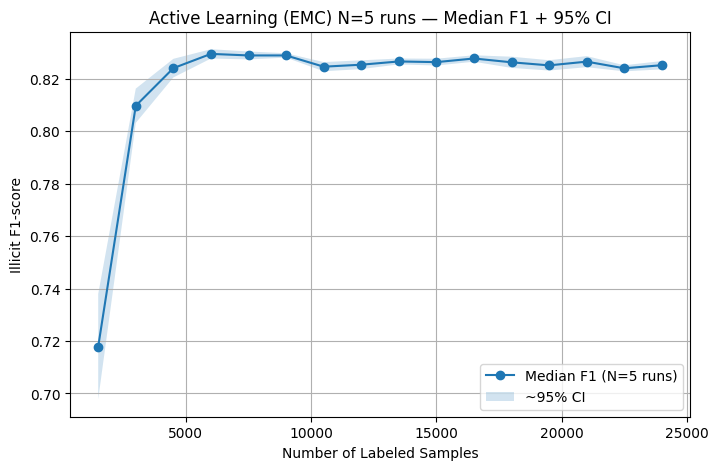

Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7579
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6823
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.6989
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7179
No more unlabeled samples.
Iteration 1/50, Labeled size: 100, F1(illicit) = 0.7481
No more unlabeled samples.

===== Mean F1-score across 5 runs per cycle =====
Cycle 01, Labeled 2000 samples: Mean F1 = 0.7210
Cycle 02, Labeled 4000 samples: Mean F1 = 0.8059
Cycle 03, Labeled 6000 samples: Mean F1 = 0.8230
Cycle 04, Labeled 8000 samples: Mean F1 = 0.8280
Cycle 05, Labeled 10000 samples: Mean F1 = 0.8296
Cycle 06, Labeled 12000 samples: Mean F1 = 0.8283
Cycle 07, Labeled 14000 samples: Mean F1 = 0.8255
Cycle 08, Labeled 16000 samples: Mean F1 = 0.8265
Cycle 09, Labeled 18000 samples: Mean F1 = 0.8268
Cycle 10, Labeled 20000 samples: Mean F1 = 0.8268
Cycle 11, Labeled 22000 samples: Mean 

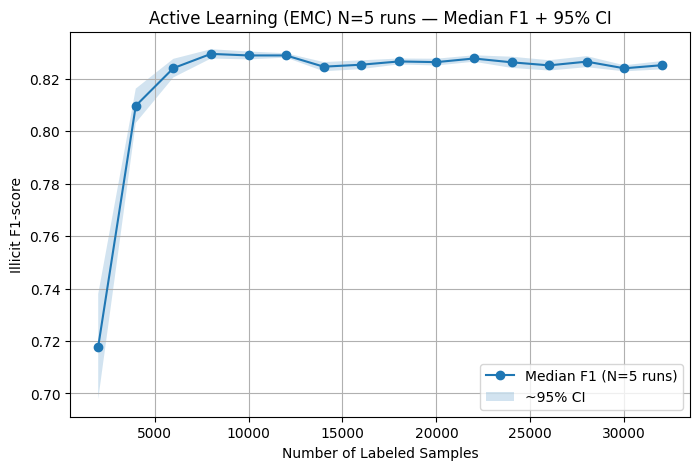

In [22]:
batch_results = {}

for batch_size in BATCH_SIZES:
    f1_model2 = active_learning_loop(
        X_train, y_train, X_test, y_test,
        batch_size=batch_size, hot_learner='expected_model_change'
    )
    batch_results[batch_size] = compute_confidence_interval(f1_model1, batch_size=batch_size)

In [23]:
import json

with open("results.json", "r") as f:
    json_input = json.load(f)
    
json_input["IF + EMC + RF"] = batch_results

with open("results.json", "w") as f:
    json.dump(json_input, f, indent=4)